##### Zadanie: ceny akcji
1. Pobierz dane dotyczące cen akcji KGHM oraz cen miedzi.
2. Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").
3. Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").
4. Wykresowi nadaj odpowiednie tytuły, zadbaj, aby wykresy miały wspólną oś x.

Rozwiązanie prześlij Mentorowi.

##### 1. Pobierz dane dotyczące cen akcji KGHM oraz cen miedzi.

In [128]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import subplots
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline 

In [129]:
kghm = pd.read_csv('kgh_d.csv')
kghm.head()


,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


<AxesSubplot: >

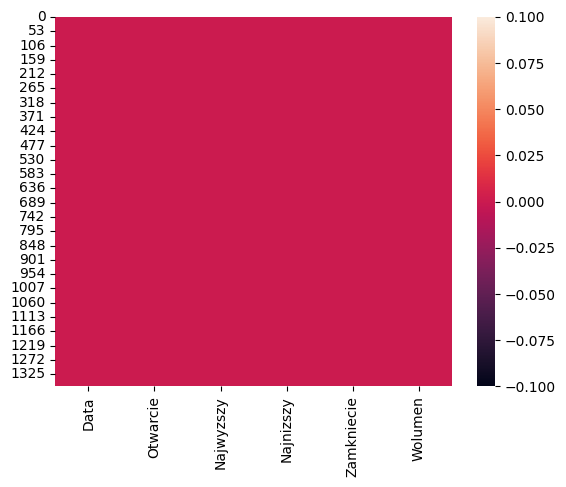

In [130]:
sns.heatmap(kghm.isnull())

In [131]:
kghm['Data'].dtypes

dtype('O')

In [132]:
kghm['Data'] = pd.to_datetime(kghm['Data'], format='%Y/%m/%d')
kghm.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [133]:
kghm['Data'].dtypes

dtype('<M8[ns]')

In [134]:
miedz = pd.read_csv('ca_c_f_d.csv')
miedz.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


In [135]:
miedz['Data'].dtype

dtype('O')

In [136]:
miedz['Data'] = pd.to_datetime(miedz['Data'], format='%Y/%m/%d')
miedz['Data'].dtype

dtype('<M8[ns]')

##### 2. Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").

In [137]:
fig = subplots.make_subplots(rows=3, cols=1, specs=[[{}],[{}],[{'type' : 'domain'}]],subplot_titles=['KGHM','Miedź'], shared_xaxes=True, row_heights=[10,10,20])
fig.add_trace(go.Scatter(x=kghm['Data'], y=kghm['Zamkniecie'], name='ceny na zamknięcie KGHM'),1,1)
fig.add_trace(go.Scatter(x=miedz['Data'], y=miedz['Zamkniecie'], name='ceny na zamknięcie Miedzi'),2,1)
fig.update_layout(title='Ceny zamknięcia KGHM oraz Miedzi')
iplot(fig)


##### 3. Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").

In [138]:
df = kghm[['Data','Zamkniecie']]
df.rename(columns={'Zamkniecie':'KGHM'}, inplace=True)
df['Miedź'] = df['Data'].map(miedz.set_index('Data')['Zamkniecie'])
df.head()

,Data,KGHM,Miedź
0,2015-01-02,102.40,6309.0
1,2015-01-05,100.09,6216.0
2,2015-01-07,104.89,6170.0
3,2015-01-08,107.11,6230.5
4,2015-01-09,104.33,6151.0


In [139]:
fig.add_trace(go.Table(
        header=dict(values=list(df.columns)),
        cells=dict(values=[df.iloc[:,num] for num in range(len(df.columns))])),row=3,col=1)
iplot(fig)